<a href="https://colab.research.google.com/github/Himanshu-sharmaonline/Hands-On-work/blob/main/kaggle/NLP_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
! pip  install -q kaggle

In [87]:
from google.colab import files

In [88]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"himanshukumarsharma","key":"fa5ee604878d59cd89053ba9b5d7643e"}'}

In [89]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [90]:
! cp kaggle.json ~/.kaggle/

In [91]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              216KB  2021-03-18 08:52:01            546  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            483  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            420  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            190  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [92]:
! kaggle competitions download -c nlp-getting-started

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [93]:
import pandas as pd
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import 	WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
from keras.optimizers import Adam
from keras import layers
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer

# nltk.download()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
train=pd.read_csv(r'/content/train.csv')
test=pd.read_csv(r'/content/test.csv')
check=pd.read_csv(r'/content/sample_submission.csv')

In [95]:
check.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [96]:
train.shape

(7613, 5)

In [97]:
train["text"]=train["text"].str.lower()
test["text"]=test["text"].str.lower()
train["keyword"].fillna("",inplace=True)
test["keyword"].fillna("",inplace=True)
train["text"]=train["text"].str.lower()+" "+train["keyword"]
test["text"]=test["text"].str.lower()+" "+test["keyword"]

In [98]:
wordnet_lemmatizer = WordNetLemmatizer()
def cleaning(text):
  text=text.replace("\n"," ")
  text = nltk.word_tokenize(text)
  text= [re.sub('[()?.><$^''\&%!]+', '', i) for i in text]
  text=[re.sub('[\\:@#_].*|[\d]+',"",i) for i in text]
  text=[i.strip() for i in text]
  text=[i for i in text if i not in stopwords.words('english') and len(i)>3 and i.startswith(("#","@","http","//"))==False]#"#" not in i and "@" not in i and i.startswith("http://")==False ]
  text=[wordnet_lemmatizer.lemmatize(i) for i in text ]
  text=[i.strip() for i in text]
  return text

In [99]:
train["Clean_text"]=[" ".join(cleaning(i)) for i in train["text"]]
test["Clean_text"]=[" ".join(cleaning(i)) for i in test["text"]]

In [100]:
train.head()

,id,keyword,location,text,target,Clean_text
0,1,,NaN,our deeds are the reason of this #earthquake m...,1,deed reason earthquake allah forgive
1,4,,NaN,forest fire near la ronge sask. canada,1,forest fire near ronge sask canada
2,5,,NaN,all residents asked to 'shelter in place' are ...,1,resident asked 'shelter place notified officer...
3,6,,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,,NaN,just got sent this photo from ruby #alaska as ...,1,sent photo ruby alaska smoke wildfire pours sc...


In [101]:
# cleaning the text 
test.head()

,id,keyword,location,text,Clean_text
0,0,,NaN,just happened a terrible car crash,happened terrible crash
1,2,,NaN,"heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,,NaN,apocalypse lighting. #spokane #wildfires,apocalypse lighting spokane wildfire
4,11,,NaN,typhoon soudelor kills 28 in china and taiwan,typhoon soudelor kill china taiwan


In [102]:
target_one=train[train["target"]==1]
target_zero=train[train["target"]==0]

In [103]:
char_mask = np.array(Image.open("/content/110618-fire-flames-adobestock_134229099.jpeg"))    
image_colors = ImageColorGenerator(char_mask)

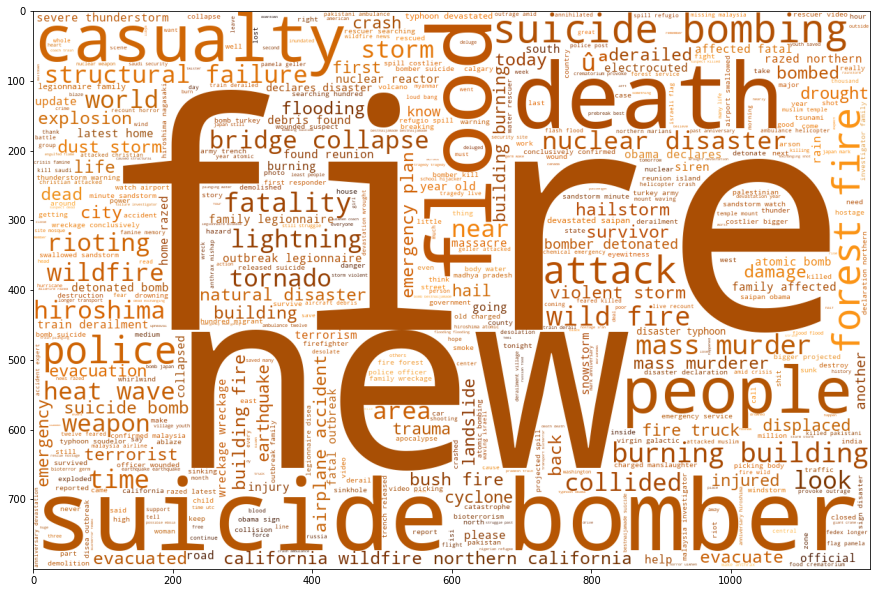

In [104]:
wc=WordCloud(background_color="white",stopwords=STOPWORDS,max_words=500,mask=char_mask, width=600, height=600,random_state=1)
wc.generate(" ".join(target_one["Clean_text"].tolist()))
plt.figure(figsize=(15,25))
plt.imshow(wc.recolor(color_func=image_colors))

# plt.imshow(wc)

In [105]:
char_mask = np.array(Image.open("/content/smart_lightbulb.jpg"))    
image_colors = ImageColorGenerator(char_mask)

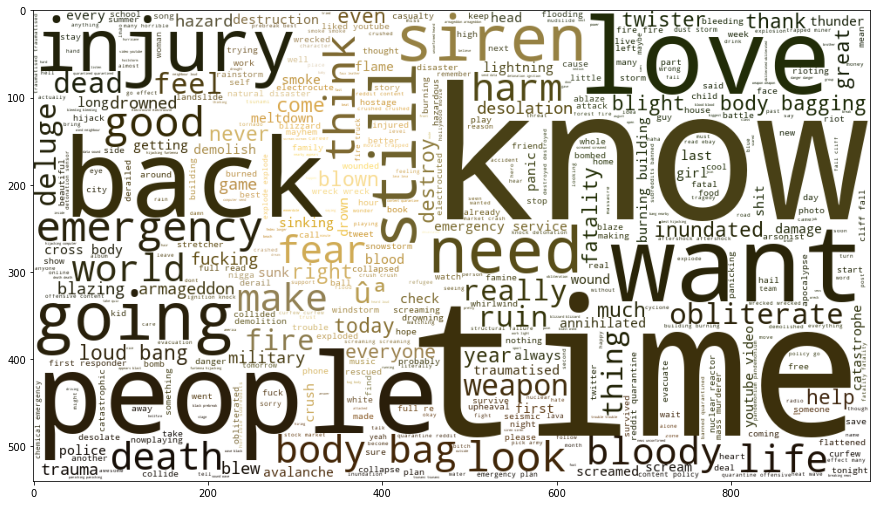

In [106]:
wc=WordCloud(background_color="white",stopwords=STOPWORDS,max_words=500,mask=char_mask, width=600, height=600,random_state=1)
wc.generate(" ".join(target_zero["Clean_text"].tolist()))
plt.figure(figsize=(15,25))
plt.imshow(wc.recolor(color_func=image_colors))


In [107]:
count_vect=CountVectorizer(analyzer='word',max_df=.90)

In [108]:
X_train=count_vect.fit_transform(train["Clean_text"].tolist())

In [ ]:
count_vect.get_feature_names()

In [110]:
train

,id,keyword,location,text,target,Clean_text
0,1,,NaN,our deeds are the reason of this #earthquake m...,1,deed reason earthquake allah forgive
1,4,,NaN,forest fire near la ronge sask. canada,1,forest fire near ronge sask canada
2,5,,NaN,all residents asked to 'shelter in place' are ...,1,resident asked 'shelter place notified officer...
3,6,,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,,NaN,just got sent this photo from ruby #alaska as ...,1,sent photo ruby alaska smoke wildfire pours sc...
...,...,...,...,...,...,...
7608,10869,,NaN,two giant cranes holding a bridge collapse int...,1,giant crane holding bridge collapse nearby home
7609,10870,,NaN,@aria_ahrary @thetawniest the out of control w...,1,aria thetawniest control wild fire california ...
7610,10871,,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,volcano hawaii
7611,10872,,NaN,police investigating after an e-bike collided ...,1,police investigating e-bike collided little po...


In [111]:
voc_size = 50000
sent_length = 30
embedding_dim = 300

X_train = [one_hot(words, voc_size) for words in train['Clean_text']]
X_train = pad_sequences(X_train, padding='pre', maxlen=sent_length)
Y_train = train['target']
X_test = [one_hot(words, voc_size) for words in test['Clean_text']]
X_test = pad_sequences(X_test, padding='pre', maxlen=sent_length)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(7613, 30) (7613,)
(3263, 30)


In [112]:
input_dim=X_train.shape[1]

In [113]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [114]:
model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(8, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(4, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                

In [115]:
X_train.shape,y_train.shape,Y_train.shape

((7613, 30), (7613,), (7613,))

In [116]:
history = model.fit(X_train, y_train,epochs=20, verbose=False, batch_size=100, shuffle = True)

In [140]:
ynew_preds=model.predict(X_test)
ynew_preds[ynew_preds>=0.5]=1
ynew_preds[ynew_preds<0.5]=0

In [149]:
check=pd.read_csv(r'/content/sample_submission.csv')

In [142]:
check["pred"]=ynew_preds

In [143]:
check["pred"]=check['pred'].astype(int)